In [1]:
import os

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\05. XG Boost'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

## Problem Statement

Rossmann operates over 3000 drug stores in 7 european countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to 6 weeks in advance. Store Sales are influenced by many factors, including promotions, competitions, school holidays, seasonality and locality.

With thousand of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales for 1150 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

##### Downloading the dataset

In [5]:
import opendatasets as od
import pandas as pd

pd.set_option("display.max_columns", 120)
pd.set_option("display.min_rows", 120)

In [6]:
od.download("https://www.kaggle.com/c/rossmann-store-sales", data_dir = "Dataset/")

Skipping, found downloaded files in "Dataset/rossmann-store-sales" (use force=True to force download)


In [7]:
os.listdir("Dataset/rossmann-store-sales")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [8]:
ross_df = pd.read_csv("Dataset/rossmann-store-sales/train.csv", low_memory = False)
store_df = pd.read_csv("Dataset/rossmann-store-sales/store.csv")
test_df = pd.read_csv("Dataset/rossmann-store-sales/test.csv")
submission_df = pd.read_csv("Dataset/rossmann-store-sales/sample_submission.csv")

In [9]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [12]:
submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Let's merge the information from the store_df into train_df and test_df

In [13]:
merged_df = ross_df.merge(store_df, how = "left", on = "Store")
merged_test_df = test_df.merge(store_df, how = "left", on = "Store")

In [14]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Preprocess and Feature Engineering 

In [15]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

##### Date 

In [16]:
def split_date(df):
    df["Date"] = pd.to_datetime(df["Date"])
    df["Year"] = df["Date"].dt.year
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["WeekOfYear"] = df["Date"].dt.isocalendar().week

In [17]:
split_date(merged_df)
split_date(merged_test_df)

In [18]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


##### Store Open/Close

In [ ]:
merged_df[merged_df["Open"] == 0]["Sales"].value_counts()

Sales
0    172817
Name: count, dtype: int64

In [20]:
merged_df = merged_df[merged_df["Open"] == 1].copy()

##### Competition

In [21]:
def comp_months(df):
    df["CompetitionOpen"] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df["CompetitionOpen"] = df["CompetitionOpen"].map(lambda x: 0 if x < 0 else x).fillna(0)

In [22]:
comp_months(merged_df)
comp_months(merged_test_df)

In [23]:
merged_df[["Date", "CompetitionDistance", "CompetitionOpenSinceYear", "CompetitionOpenSinceMonth", "CompetitionOpen"]].sample(10)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
172736,2015-02-27,190.0,2008.0,6.0,80.0
939786,2013-03-11,3970.0,2010.0,3.0,36.0
780105,2013-08-01,460.0,2014.0,11.0,0.0
910574,2013-04-06,1080.0,2008.0,4.0,60.0
64942,2015-06-03,8480.0,NaN,NaN,0.0
5536,2015-07-27,3750.0,2001.0,11.0,164.0
143845,2015-03-24,960.0,2011.0,11.0,40.0
186435,2015-02-14,3840.0,2008.0,10.0,76.0
509612,2014-04-01,60.0,2006.0,4.0,96.0
428991,2014-06-12,220.0,2002.0,2.0,148.0


In [24]:
def check_promo_month(row):
    month2str = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                 7: "Jul", 8: "Aug", 9: "Sept", 10: "Oct", 11: "Nov", 12: "Dec"}
    
    try:
        months = (row["PromoInterval"] or "").split(",")
        if row["Promo2Open"] and month2str[row["Month"]] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
    
def promo_cols(df):
    df["Promo2Open"] = (df.Year - df.Promo2SinceYear) * 12 + (df.WeekOfYear - df.Promo2SinceWeek) / 4.345
    df["Promo2Open"] = df["Promo2Open"].map(lambda x: 0 if x < 0 else x).fillna(0) * df["Promo2"]
    
    df["IsPromo2Month"] = df.apply(check_promo_month, axis = 1) * df["Promo2"]

In [25]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [26]:
merged_df[["Date", "Promo2", "Promo2SinceYear", "Promo2SinceWeek", "PromoInterval", "Promo2Open", "IsPromo2Month"]].sample(5)

,Date,Promo2,Promo2SinceYear,Promo2SinceWeek,PromoInterval,Promo2Open,IsPromo2Month
170982,2015-02-28,0,NaN,NaN,NaN,0.000000,0
82153,2015-05-19,1,2013.0,31.0,"Feb,May,Aug,Nov",21.698504,1
540447,2014-03-04,0,NaN,NaN,NaN,0.000000,0
849287,2013-05-31,0,NaN,NaN,NaN,0.000000,0
24347,2015-07-10,0,NaN,NaN,NaN,0.000000,0


In [27]:
merged_df.shape

(844392, 25)

#### Inputs and Target Columns

In [28]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [29]:
input_cols = ["Store", "DayOfWeek", "Promo", "StateHoliday", "SchoolHoliday",
              "StoreType", "Assortment", "CompetitionDistance", "CompetitionOpen",
              "Day", "Month", "Year", "WeekOfYear", "Promo2", "Promo2Open", "IsPromo2Month"]

target_col = "Sales"

In [30]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [31]:
test_inputs = merged_test_df[input_cols].copy()

In [32]:
inputs.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,Day,Month,Year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.142693,1
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.912543,1
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0


In [33]:
numeric_cols = ["Store", "Promo", "SchoolHoliday",
                "CompetitionDistance", "CompetitionOpen", "Promo2", "Promo2Open", "IsPromo2Month",
                "Day", "Month", "Year", "WeekOfYear"]

cat_cols = [col for col in input_cols if col not in numeric_cols]

#### Impute missing numerical data

In [34]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [35]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [36]:
max_distance = inputs.CompetitionDistance.max()

In [37]:
inputs["CompetitionDistance"] = inputs["CompetitionDistance"].fillna(max_distance * 2)
test_inputs["CompetitionDistance"] = test_inputs["CompetitionDistance"].fillna(max_distance * 2)

#### Scaling the numerical values

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [40]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encode Categorical Columns

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore").fit(inputs[cat_cols])
encoded_columns = list(encoder.get_feature_names_out(cat_cols))

In [43]:
inputs[encoded_columns] = encoder.transform(inputs[cat_cols])
test_inputs[encoded_columns] = encoder.transform(test_inputs[cat_cols])

In [44]:
X_train = inputs[numeric_cols + encoded_columns]
X_test = test_inputs[numeric_cols + encoded_columns]

We haven't created a validation set because we will be using k-fold cross validation.

In [45]:
X_train.head()

,Store,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpen,Promo2,Promo2Open,IsPromo2Month,Day,Month,Year,WeekOfYear,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,0.000000,1.0,1.0,0.008240,0.059163,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,0.066378,1.0,0.890871,1.0,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,0.074315,1.0,0.721008,1.0,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.050505,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.003591,1.0,1.0,0.197034,0.002165,0.0,0.000000,0.0,1.0,0.545455,1.0,0.588235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Gradient Boosing Machine

##### Training

In [46]:
from xgboost import XGBRegressor

In [47]:
model = XGBRegressor(random_state = 42, n_jobs = -1, n_estimators = 20, max_depth = 4)

In [48]:
model.fit(X_train, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

##### Predictions

In [49]:
preds = model.predict(X_train)

In [50]:
preds[:5]

array([8073.2007, 7278.4395, 8812.854 , 9337.714 , 8050.433 ],
      dtype=float32)

##### Evaluation

In [51]:
from sklearn.metrics import root_mean_squared_error

In [52]:
def rmse(a, b):
    return root_mean_squared_error(a, b)

In [53]:
rmse(preds, targets)

2357.1278101525777

##### Visualization

In [54]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams["figure.figsize"] = (30, 30)

<Axes: >

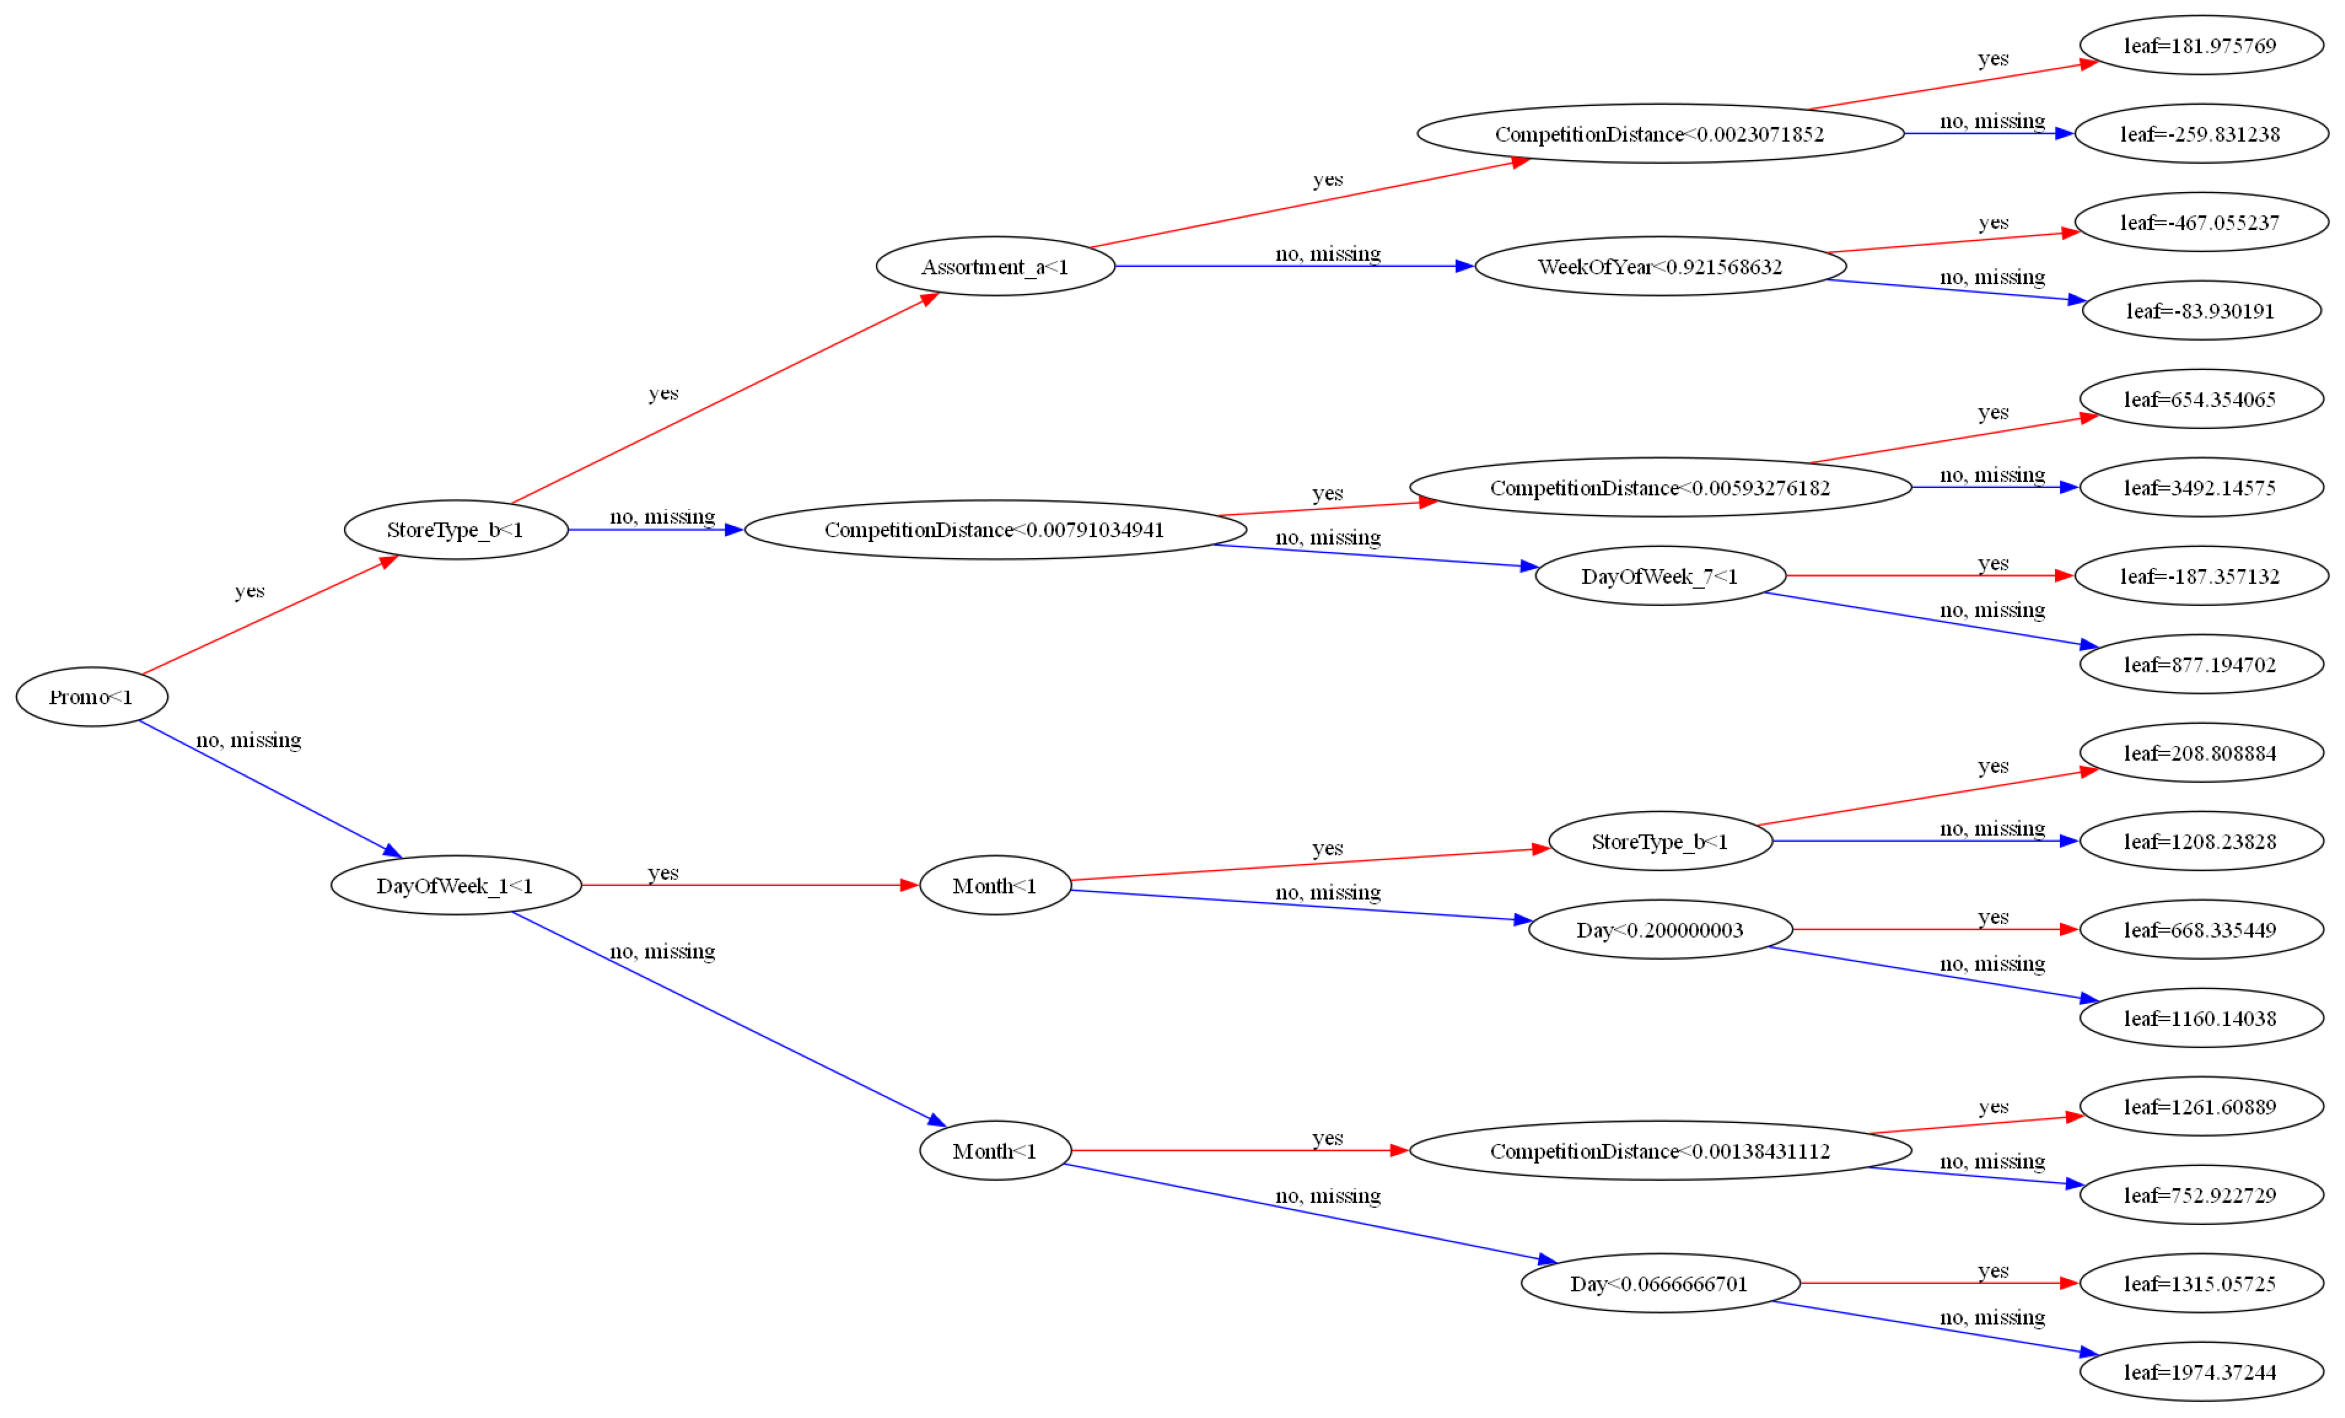

In [55]:
plot_tree(model, rankdir = "LR", num_trees = 0)

<Axes: >

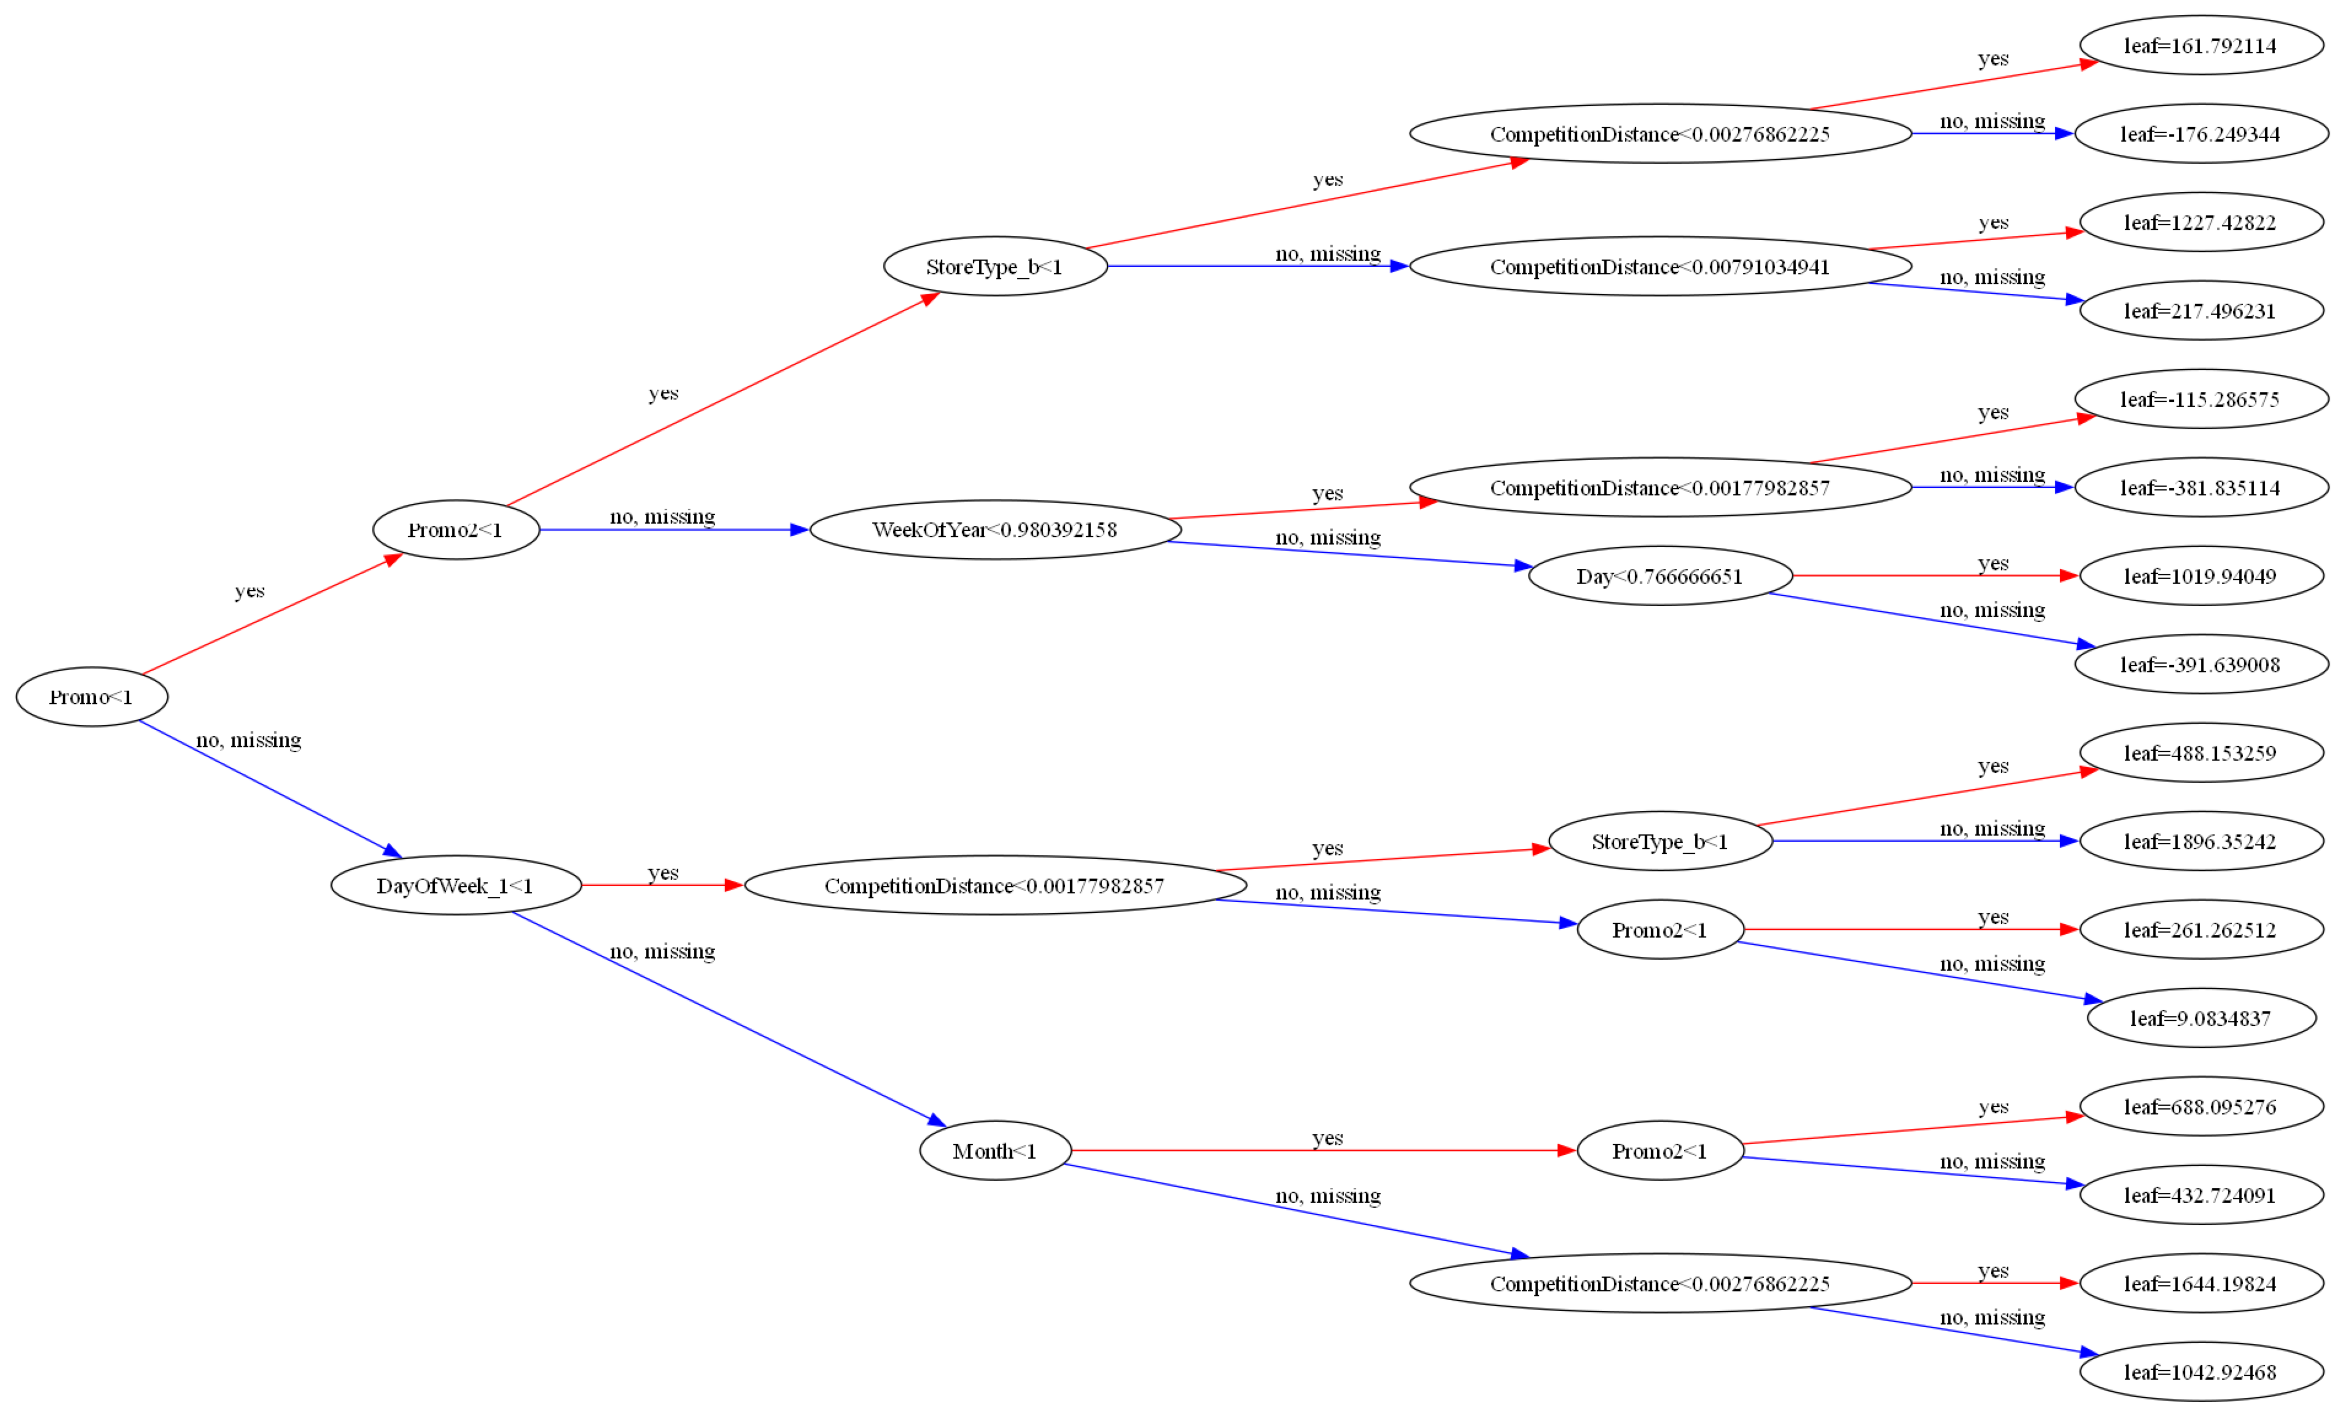

In [56]:
plot_tree(model, rankdir = "LR", num_trees = 1)

<Axes: >

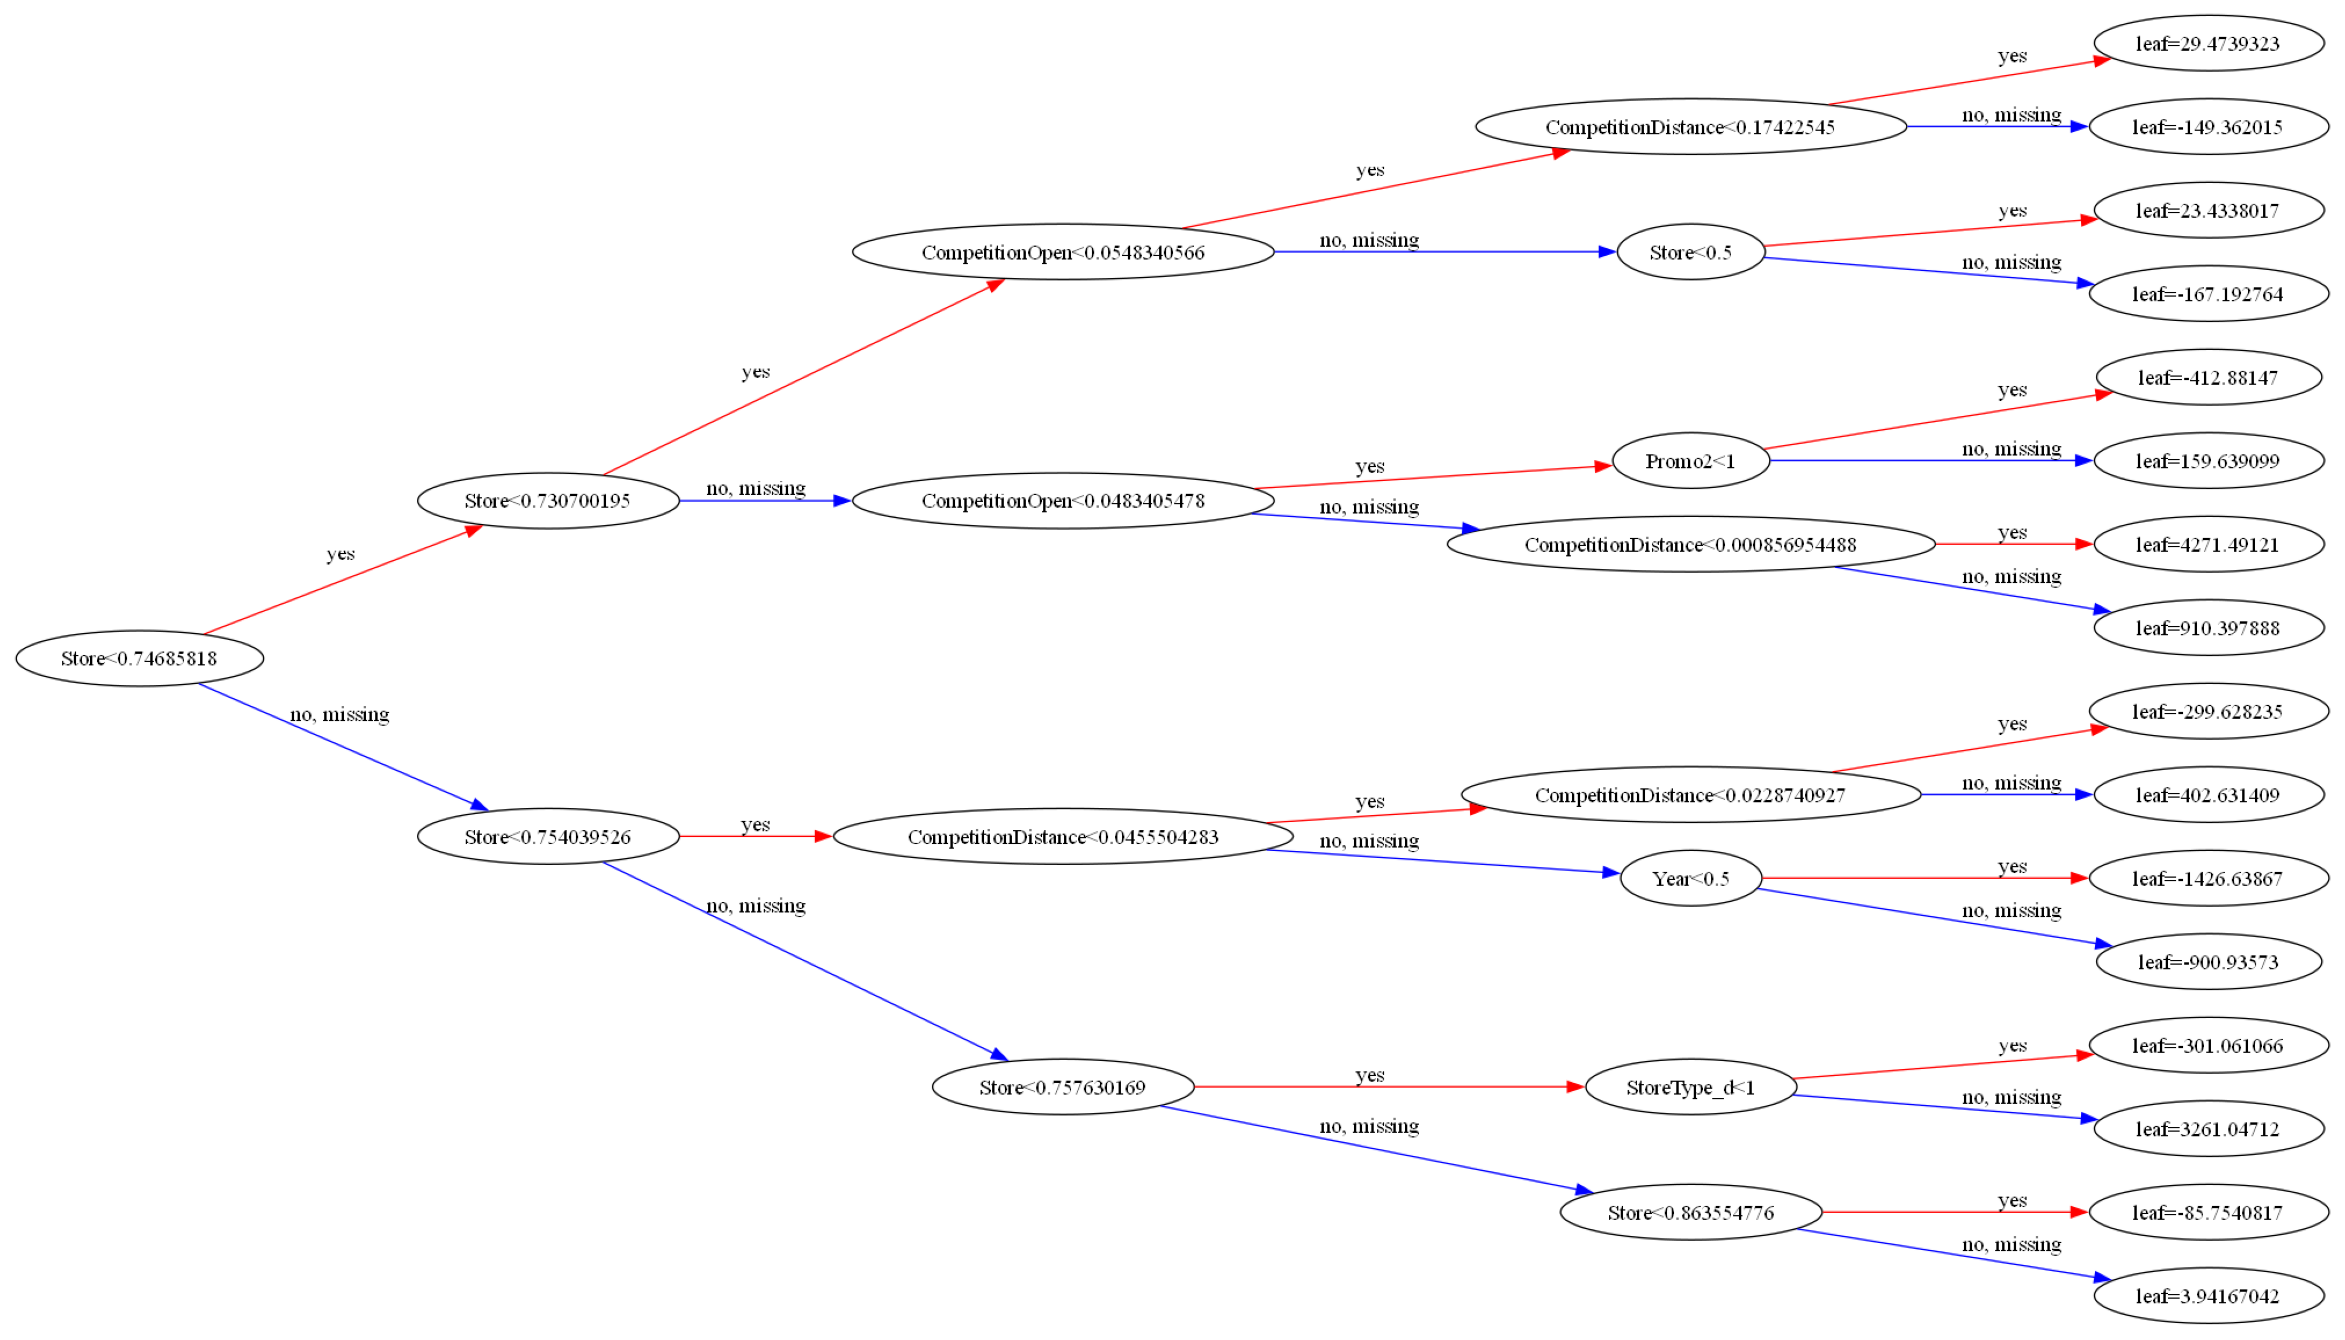

In [57]:
plot_tree(model, rankdir = "LR", num_trees = 19)

In [58]:
trees = model.get_booster().get_dump()

In [59]:
len(trees)

20

In [60]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.0023071852] yes=15,no=16,missing=16
				15:leaf=181.975769
				16:leaf=-259.831238
			8:[WeekOfYear<0.921568632] yes=17,no=18,missing=18
				17:leaf=-467.055237
				18:leaf=-83.930191
		4:[CompetitionDistance<0.00791034941] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.00593276182] yes=19,no=20,missing=20
				19:leaf=654.354065
				20:leaf=3492.14575
			10:[DayOfWeek_7<1] yes=21,no=22,missing=22
				21:leaf=-187.357132
				22:leaf=877.194702
	2:[DayOfWeek_1<1] yes=5,no=6,missing=6
		5:[Month<1] yes=11,no=12,missing=12
			11:[StoreType_b<1] yes=23,no=24,missing=24
				23:leaf=208.808884
				24:leaf=1208.23828
			12:[Day<0.200000003] yes=25,no=26,missing=26
				25:leaf=668.335449
				26:leaf=1160.14038
		6:[Month<1] yes=13,no=14,missing=14
			13:[CompetitionDistance<0.00138431112] yes=27,no=28,missing=28
				27:leaf=1261.60889
				28:leaf=752

##### Feature Importance

In [61]:
importance_df = pd.DataFrame({
    "features": X_train.columns,
    "importance": model.feature_importances_
}).sort_values(by = "importance", ascending = False)

In [62]:
importance_df.head(10)

,features,importance
1,Promo,0.309244
12,DayOfWeek_1,0.076455
26,StoreType_d,0.071732
24,StoreType_b,0.066487
5,Promo2,0.040490
3,CompetitionDistance,0.039816
27,Assortment_a,0.038316
25,StoreType_c,0.036829
4,CompetitionOpen,0.034157
9,Month,0.026813


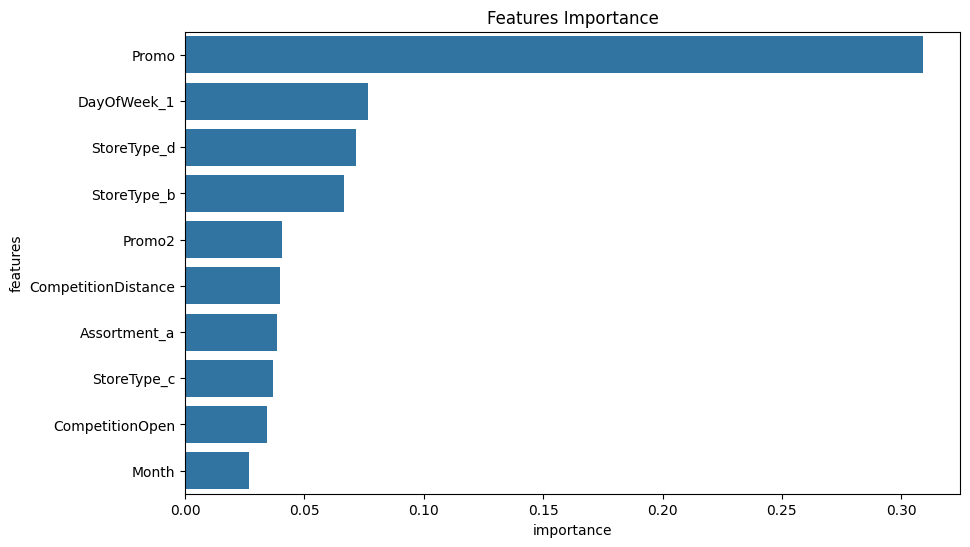

In [63]:
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title("Features Importance")
sns.barplot(data = importance_df.head(10), x = "importance", y = "features")
plt.show()

#### K-fold cross Validation

In [64]:
from sklearn.model_selection import KFold

In [65]:
def train_and_evaluate(X_train, targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state = 42, n_jobs = -1, **params)
    model.fit(X_train, targets)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = rmse(train_preds, targets)
    val_rmse = rmse(val_preds, val_targets)
    
    return model, train_rmse, val_rmse

In [66]:
kfold = KFold(n_splits = 5)

In [67]:
models = []

for train_idxs, val_idxs in kfold.split(X_train):

    X_train_fold, train_targets = X_train.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X_train.iloc[val_idxs], targets.iloc[val_idxs]

    model, train_rmse, val_rmse = train_and_evaluate(X_train_fold, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     n_estimators = 20, 
                                                     max_depth = 4)
    models.append(model)
    
    print(f"Train RMSE: {train_rmse}, Validation RMSE: {val_rmse}")

Train RMSE: 2370.7136430479463, Validation RMSE: 2448.739998478758
Train RMSE: 2376.830658491627, Validation RMSE: 2413.5622536102155
Train RMSE: 2386.944071778845, Validation RMSE: 2364.856120007352
Train RMSE: 2348.3401652445446, Validation RMSE: 2458.1552579968957
Train RMSE: 2370.9691440768092, Validation RMSE: 2441.7500928714353


In [68]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis = 0)

In [69]:
preds = predict_avg(models, X_train)

In [70]:
preds[:5]

array([8013.9463, 7508.8916, 8623.156 , 9544.276 , 7468.246 ],
      dtype=float32)

#### Hyper parameter Tuning and Regularization

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train_split, X_val, train_targets, val_targets = train_test_split(X_train, targets, test_size = 0.1)

In [73]:
def test_params(**params):
    model = XGBRegressor(random_state = 42, n_jobs = -1, **params)
    model.fit(X_train_split, train_targets)
    
    train_preds = model.predict(X_train_split)
    val_preds = model.predict(X_val)
    
    train_rmse = rmse(train_preds, train_targets)
    val_rmse = rmse(val_preds, val_targets)
    
    print(f"Train RMSE: {train_rmse}, Val RMSE: {val_rmse}")

`n_estimators`

In [74]:
test_params(n_estimators = 10)

Train RMSE: 2356.6841179802527, Val RMSE: 2342.2555948501267


In [75]:
test_params(n_estimators = 30)

Train RMSE: 1817.0136187257026, Val RMSE: 1814.5849019825746


In [76]:
test_params(n_estimators = 100)

Train RMSE: 1159.7881587420027, Val RMSE: 1160.630007370216


In [77]:
test_params(n_estimators = 240)

Train RMSE: 901.66122245174, Val RMSE: 910.190576804234


`max_depth`

In [78]:
test_params(max_depth = 2, n_estimators = 200)

Train RMSE: 2247.0120795051625, Val RMSE: 2237.505147275943


In [79]:
test_params(max_depth = 5, n_estimators = 200)

Train RMSE: 1113.4093119550976, Val RMSE: 1113.4398278889064


In [80]:
test_params(max_depth = 10, n_estimators = 200)

Train RMSE: 552.8896121015414, Val RMSE: 701.404173884288


`learning_rate`

In [81]:
test_params(n_estimators = 50, learning_rate = 0.1)

Train RMSE: 2188.1330374681766, Val RMSE: 2182.030392069871


In [82]:
test_params(n_estimators = 50, learning_rate = 0.3)

Train RMSE: 1528.0359309342368, Val RMSE: 1528.6013340503725


In [83]:
test_params(n_estimators = 50, learning_rate = 0.9)

Train RMSE: 1140.0968664472841, Val RMSE: 1146.2538880478235


In [84]:
test_params(n_estimators = 50, learning_rate = 0.99)

Train RMSE: 1140.4218444835492, Val RMSE: 1149.8493140465137


#### Putting it together and making the predictions

In [85]:
model = XGBRegressor(n_estimators = 2000, n_jobs = -1, random_state = 42,
                     learning_rate = 0.2, max_depth = 10, subsample = 0.9,
                     colsample_bytree = 0.7)

In [86]:
model.fit(X_train, targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [87]:
test_preds = model.predict(X_test)

In [88]:
submission_df["Sales"] = test_preds

In [91]:
submission_df.head(10)

,Id,Sales
0,1,4244.267090
1,2,7855.820801
2,3,9334.964844
3,4,7410.885254
4,5,7289.384766
5,6,5408.195801
6,7,7234.078125
7,8,7765.771484
8,9,5497.365234
9,10,5382.611328


In [90]:
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [89]:
test_df.Open.isna().sum()

11

In [92]:
submission_df["Sales"] = submission_df["Sales"] * test_df["Open"].fillna(1)

In [93]:
submission_df.head(10)

,Id,Sales
0,1,4244.267090
1,2,7855.820801
2,3,9334.964844
3,4,7410.885254
4,5,7289.384766
5,6,5408.195801
6,7,7234.078125
7,8,7765.771484
8,9,5497.365234
9,10,5382.611328


In [95]:
submission_df.to_csv("05. XG Boost/submission.csv", index = None)